In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')



In [2]:
data = pd.read_csv("C:\\Users\\Pavan Kalyan\\MSFT.csv")
print(data.head(10))

         Date        Open        High         Low       Close   Adj Close  \
0  2021-04-27  261.579987  263.190002  260.119995  261.970001  259.853394   
1  2021-04-28  256.079987  256.540009  252.949997  254.559998  252.503250   
2  2021-04-29  255.460007  256.100006  249.000000  252.509995  250.469818   
3  2021-04-30  249.740005  253.080002  249.600006  252.179993  250.142471   
4  2021-05-03  253.399994  254.350006  251.119995  251.860001  249.825073   
5  2021-05-04  250.970001  251.210007  245.759995  247.789993  245.787933   
6  2021-05-05  249.059998  249.500000  245.820007  246.470001  244.478622   
7  2021-05-06  246.449997  249.860001  244.690002  249.729996  247.712280   
8  2021-05-07  252.149994  254.300003  251.169998  252.460007  250.420227   
9  2021-05-10  250.869995  251.729996  247.119995  247.179993  245.182877   

     Volume  
0  31014200  
1  46903100  
2  40589000  
3  30945100  
4  19626600  
5  32756100  
6  21901300  
7  26491100  
8  27032900  
9  29299900 

In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,295.008537,297.698696,291.899328,294.927194,293.945921,2.823215e+07
std,26.369753,26.591388,25.917832,26.298375,26.563349,1.070648e+07
min,239.309998,243.229996,238.070007,239.000000,237.068970,1.390020e+07
25%,280.339996,283.959991,277.390015,280.519989,279.770935,2.130740e+07
50%,296.220001,298.720001,293.489990,296.029999,295.419159,2.618680e+07
75%,309.630005,312.380005,306.459991,310.200012,309.552460,3.267430e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,9.042890e+07


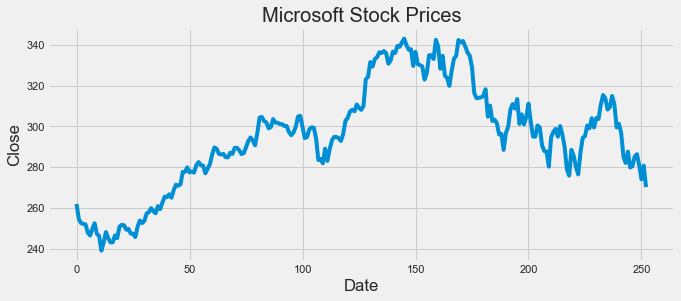

In [4]:
plt.figure(figsize=(10, 4))
plt.title("Microsoft Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

<AxesSubplot:>

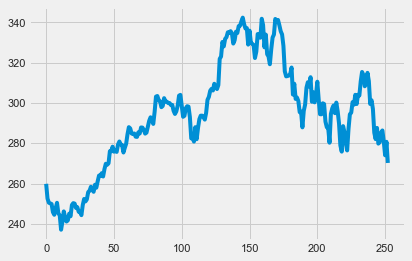

In [5]:
data ['Adj Close'].plot()

<AxesSubplot:title={'center':'Correlation with Adj Close'}>

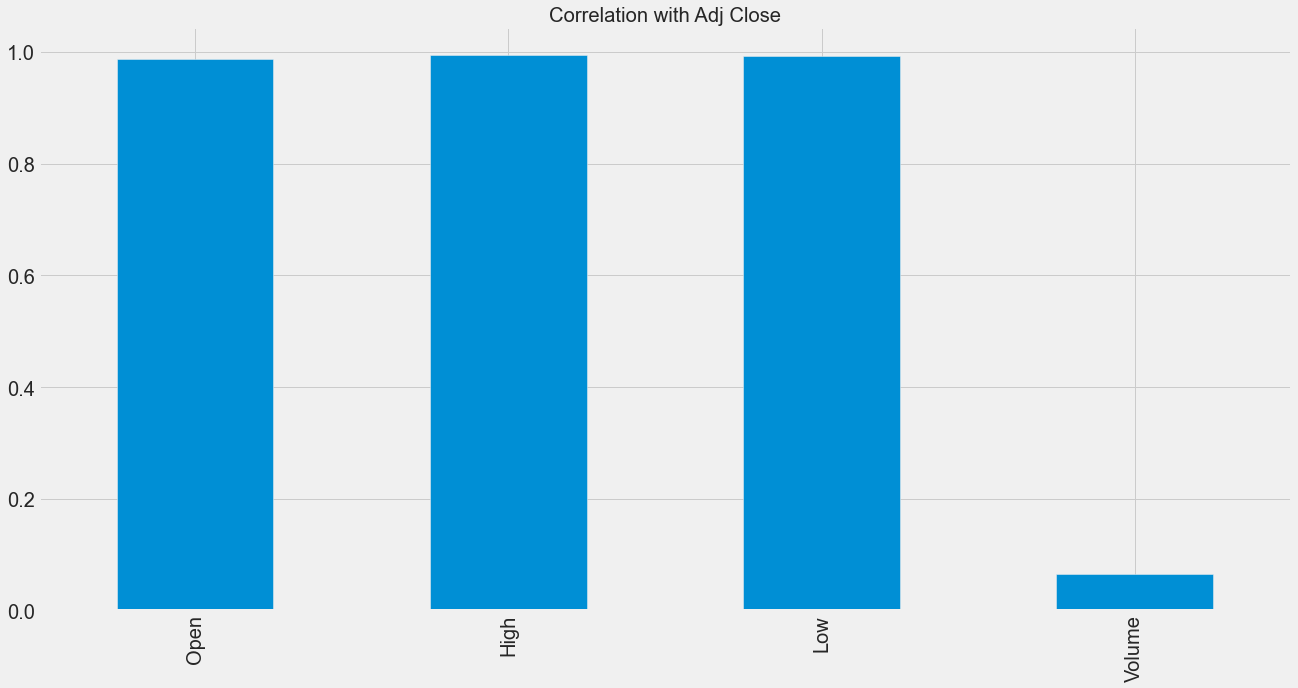

In [6]:

X=data.drop(['Adj Close'],axis=1)
X=X.drop(['Close'],axis=1)
X.corrwith(data['Adj Close']).plot.bar(
        figsize = (20, 10), title = "Correlation with Adj Close", fontsize = 20,
        rot = 90, grid = True)

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.995714  0.993944  0.987631   0.987805  0.075847
High       0.995714  1.000000  0.992925  0.993898   0.994531  0.105010
Low        0.993944  0.992925  1.000000  0.994013   0.993324  0.013678
Close      0.987631  0.993898  0.994013  1.000000   0.999781  0.057868
Adj Close  0.987805  0.994531  0.993324  0.999781   1.000000  0.065590
Volume     0.075847  0.105010  0.013678  0.057868   0.065590  1.000000


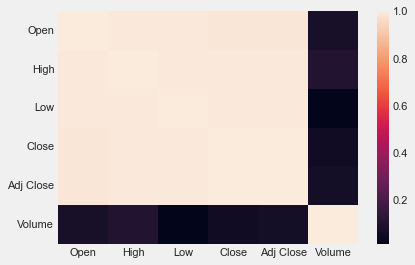

In [7]:
print(data.corr())
sns.heatmap(data.corr())
plt.show()

In [8]:
x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted_Rate": ypred})
print(data.head(10))

   Predicted_Rate
0      284.000000
1      247.789993
2      294.600006
3      297.250000
4      295.220001
5      302.380005
6      309.160004
7      302.380005
8      250.789993
9      252.460007


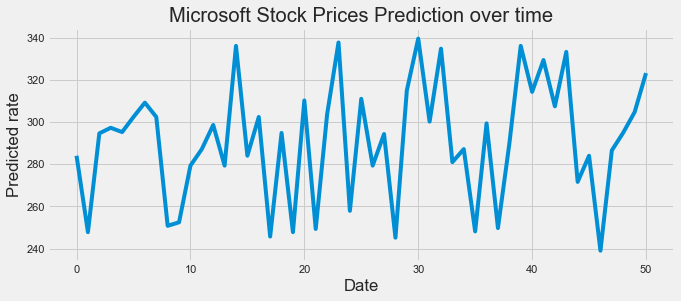

In [10]:
plt.figure(figsize=(10, 4))
plt.title("Microsoft Stock Prices Prediction over time")
plt.xlabel("Date")
plt.ylabel("Predicted rate")
plt.plot(data)
plt.show()

In [13]:
dataset_test = pd.read_csv('C:\\Users\\Pavan Kalyan\\MSFT.csv')
real_Sales = dataset_test.iloc[:, 1:2].values

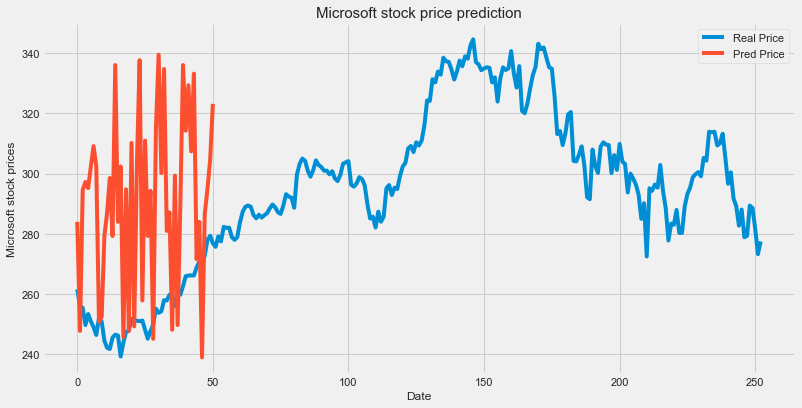

In [14]:
plt.figure(figsize=(12,6))
plt.plot(real_Sales, label = 'Real Price')
plt.plot(data, label = 'Pred Price')
plt.xlabel('Date', size=12)
plt.ylabel('Microsoft stock prices', size=12)
plt.title('Microsoft stock price prediction',size=15)
plt.legend()